In [26]:
import pyspark as ps 
import pandas as pd 
import matplotlib.pyplot as plt 

In [27]:
spark = (ps.sql.SparkSession.builder
       .master("local[4]")
       .appName("sparkSQL exercise")
       .getOrCreate()
       )

In [28]:
sc = spark.sparkContext

In [29]:
sc


<SparkContext master=local[4] appName=sparkSQL exercise>

In [30]:
df = spark.read.csv('../../../../Desktop/DSI/Data_Sets/245_1 .csv',
                   header = True,
                   quote = '"',
                   sep = ',',
                   inferSchema = True)

In [31]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviews.date: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- reviews.didPurchase: boolean (nullable = true)
 |-- reviews.doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviews.rating: integer (nullable = true)
 |-- reviews.sourceURLs: string (nullable = true)
 |-- reviews.text: string (nullable = true)
 |-- reviews.title: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.us

In [32]:
df.describe()


DataFrame[summary: string, id: string, brand: string, categories: string, ean: string, keys: string, manufacturer: string, manufacturerNumber: string, name: string, reviews.date: string, reviews.dateSeen: string, reviews.id: string, reviews.numHelpful: string, reviews.rating: string, reviews.sourceURLs: string, reviews.text: string, reviews.title: string, reviews.userCity: string, reviews.userProvince: string, reviews.username: string, upc: string]

In [33]:
df = df.withColumnRenamed('reviews.date','reviewsdate').withColumnRenamed("reviews.didPurchase","didPurchase").withColumnRenamed('reviews.doRecommend','doRecommend').withColumnRenamed('reviews.rating','reviewsrating').withColumnRenamed('reviews.text','reviewstext').withColumnRenamed('reviews.title','reviewstitle').withColumnRenamed('reviews.sourceURLs','URL')


In [34]:
df.createOrReplaceTempView('df_reviews')

In [35]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- dateAdded: timestamp (nullable = true)
 |-- dateUpdated: timestamp (nullable = true)
 |-- ean: string (nullable = true)
 |-- keys: string (nullable = true)
 |-- manufacturer: string (nullable = true)
 |-- manufacturerNumber: string (nullable = true)
 |-- name: string (nullable = true)
 |-- reviewsdate: string (nullable = true)
 |-- reviews.dateAdded: timestamp (nullable = true)
 |-- reviews.dateSeen: string (nullable = true)
 |-- didPurchase: boolean (nullable = true)
 |-- doRecommend: boolean (nullable = true)
 |-- reviews.id: integer (nullable = true)
 |-- reviews.numHelpful: integer (nullable = true)
 |-- reviewsrating: integer (nullable = true)
 |-- URL: string (nullable = true)
 |-- reviewstext: string (nullable = true)
 |-- reviewstitle: string (nullable = true)
 |-- reviews.userCity: string (nullable = true)
 |-- reviews.userProvince: string (nullable = true

In [295]:
df_sql_brand = spark.sql("SELECT brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL,upc FROM df_reviews")
df_sql_brand.show(10)

+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+-----------+
|          brand|          categories|        manufacturer|                name|         reviewsdate|didPurchase|doRecommend|reviewsrating|         reviewstext|      reviewstitle|                 URL|        upc|
+---------------+--------------------+--------------------+--------------------+--------------------+-----------+-----------+-------------+--------------------+------------------+--------------------+-----------+
|Universal Music|Movies, Music & B...|Universal Music G...|Pink Friday: Roma...|2012-11-30T06:21:...|       null|       null|            5|i love this album...|      Just Awesome|https://redsky.ta...|6.02537E+11|
|       Lundberg|Food,Packaged Foo...|            Lundberg|Lundberg Organic ...|2017-07-09T00:00:...|       true|       null|            5|Good flav

In [296]:
pandas_df = df_sql_brand.toPandas()

In [38]:
len(pandas_df)


71044

In [221]:
pandas_df['brand'].value_counts().head(40)

Clorox                        10700
Universal Home Video           6178
Tide                           5384
FOX                            4498
Disney                         3692
Olay                           3420
Warner Home Video              3330
L'Oreal Paris                  2683
L'oreal Paris                  2288
Sony Pictures                  2161
Rubbermaid                     1939
Warner Bros.                   1920
Quilted Northern               1439
Lionsgate                      1351
Burt's Bees                     965
Summit Entertainment            821
Nexxus                          773
Maybelline                      742
Pantene                         655
Foodsaver                       587
Head & Shoulders                565
Kiss                            562
Aveeno                          442
Lundberg                        426
Lemi Shine                      423
Just For Men                    416
Clear Scalp & Hair Therapy      377
Hoover                      

In [328]:
branddat= pandas_df[(pandas_df['brand']=='Clorox')|(pandas_df['brand']=='Lysol')|(pandas_df['brand']=="L'Oreal Paris")|(pandas_df['brand']=="L'oreal Paris")|(pandas_df['brand']=="Maybelline")]
    
branddat[]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL,upc
6588,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,None,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6589,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,None,None,1,I have been an avid user of Clorox Wipes for m...,Smell,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6590,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,None,None,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6591,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,None,None,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,https://redsky.target.com/groot-domain-api/v1/...,44600015996
6592,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,https://www.walmart.com/reviews/product/148983...,44600015996
...,...,...,...,...,...,...,...,...,...,...,...,...
62720,Maybelline,"Personal Care,Makeup,Eye Makeup,Mascara,Beauty...",Maybelline,Maybelline Great Lash Lots Of Lashes Washable ...,2012-09-26T00:00:00.000Z,False,None,5,I've been using Great Lash for decades. My sis...,great brush,https://www.walmart.com/reviews/product/17324487,41554239416
62721,Maybelline,"Personal Care,Makeup,Eye Makeup,Mascara,Beauty...",Maybelline,Maybelline Great Lash Lots Of Lashes Washable ...,2016-05-02T00:00:00.000Z,False,None,5,"I've worn Royal Blue for decades, it's become ...",Bring Back the BLUE,https://www.walmart.com/reviews/product/17324487,41554239416
62722,Maybelline,"Personal Care,Makeup,Eye Makeup,Mascara,Beauty...",Maybelline,Maybelline Great Lash Lots Of Lashes Washable ...,2012-09-27T00:00:00.000Z,False,None,5,I have been using this since it first came out...,Great Lash the Greatest,https://www.walmart.com/reviews/product/17324487,41554239416
62723,Maybelline,"Personal Care,Makeup,Eye Makeup,Mascara,Beauty...",Maybelline,Maybelline Great Lash Lots Of Lashes Washable ...,2016-06-24T00:00:00.000Z,False,None,5,This has been my go-to mascara for a long time...,Go-To Fav,https://www.walmart.com/reviews/product/17324487,41554239416


In [321]:
clordf = pandas_df[pandas_df['brand']=="Clorox"]
clordf

clordf['upc'].value_counts()              


44600015996                       8606
44,600,080,338,044,600,000,000    2093
44,600,016,924,743,800,000,000       1
Name: upc, dtype: int64

In [306]:
clordf['upc'].value_counts()


44600015996                       8606
44,600,080,338,044,600,000,000    2093
44,600,016,924,743,800,000,000       1
Name: upc, dtype: int64

In [308]:
olay=pandas_df[pandas_df['brand']=="Olay"]
olay['upc'].value_counts()

781,549,235,602,075,000,000,000    2766
75609007408                         651
75,609,007,477,075,600,000,000        3
Name: upc, dtype: int64

In [309]:
lysol=pandas_df[pandas_df["brand"]=='Lysol']
lysol['upc'].value_counts()

19,200,808,330,019,200,000,000    180
19,200,022,019,885,800,000,000    156
Name: upc, dtype: int64

In [318]:
lysol['upc'].value_counts(100)

19,200,808,330,019,200,000,000    0.535714
19,200,022,019,885,800,000,000    0.464286
Name: upc, dtype: float64

In [342]:
pandas_df['didPurchase'].value_counts()

False    28476
True      3682
Name: didPurchase, dtype: int64

In [313]:
tide = pandas_df[pandas_df['brand']== 'Tide']
tide['upc'].value_counts()

37000138822    3498
37000917342    1886
Name: upc, dtype: int64

In [315]:
loreal1=pandas_df[pandas_df["brand"]== "L'Oreal Paris" ]

loreal2= pandas_df[pandas_df["brand"]== "L'oreal Paris"]
loreal=loreal1.append(loreal2)
loreal['upc'].value_counts()

71249334966    2288
71249227916    2283
71249207284     102
71249165850      75
71249212592      47
71249243954      41
71249274538      33
71249208472      33
71249276747      32
71249274620      23
71249248645       9
atxeve            1
kar54             1
 voluminous       1
Name: upc, dtype: int64

In [317]:
maybel = pandas_df[pandas_df['brand']=='Maybelline']
maybel['upc'].value_counts()

41554259247                       262
41554284980                       246
41554239416                       118
41554294231                       109
41554295580                         4
41,554,198,270,033,000,000,000      2
41554294262                         1
Name: upc, dtype: int64

In [341]:
verifieddf['reviewsrating'].value_counts()

5    2677
4     596
3     191
1     128
2      90
Name: reviewsrating, dtype: int64

In [334]:
nverifieddf['brand'].value_counts().head(20)


Clorox              8378
Olay                3385
Tide                2981
L'Oreal Paris       1380
Rubbermaid          1297
Quilted Northern    1253
L'oreal Paris       1211
Burt's Bees          903
Kiss                 556
Nexxus               510
Maybelline           481
Head & Shoulders     295
Windex               295
Avery                269
Lysol                263
Storkcraft           244
Just For Men         233
Tostitos             206
Suave                201
Pantene              197
Name: brand, dtype: int64

In [150]:
high_unverified= nverifieddf[nverifieddf['reviewsrating']>3]
nverifieddf['brand'].value_counts()

Clorox           8378
Olay             3385
Tide             2981
L'Oreal Paris    1380
Rubbermaid       1297
                 ... 
Kenroy Home         1
bareMinerals        1
Dremel              1
Nordicware          1
Walkers             1
Name: brand, Length: 205, dtype: int64

In [220]:
verifieddf['brand'].value_counts().head(20)

Foodsaver                477
Pantene                  450
Just For Men             183
Hormel                    95
Coty                      88
Chester's                 79
Tostitos                  78
Lysol                     72
L'Oreal Paris             71
Biotene                   63
Cinnamon Toast Crunch     59
Softsoap                  54
Cheetos                   52
Disney                    49
Tide                      49
Opti-Free                 48
Bisquick                  48
Maybelline                42
Summit Entertainment      41
Chips Ahoy                41
Name: brand, dtype: int64

In [236]:
pandas_df[''].value_counts()

True     55587
False     4842
Name: doRecommend, dtype: int64

In [103]:
verifieddf = pandas_df[pandas_df["didPurchase"] == True]
verifieddf

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good,https://www.walmart.com/reviews/product/29775278
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good,https://www.walmart.com/reviews/product/29775278
18,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-01T00:00:00.000Z,True,True,3,I bought this because it had better reviews th...,Pretty nice,https://www.walmart.com/reviews/product/43383370
23,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2017-08-15T00:00:00.000Z,True,None,5,Loved This review was collected as part of a p...,Loved,https://www.walmart.com/reviews/product/43383370
24,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-11-26T00:00:00.000Z,True,True,5,This is a good product. Will give you a great ...,Great sensation,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71020,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-11T00:00:00.000Z,True,True,5,I recommend this for people with dry eye who s...,Works For Dry Eye,https://www.walmart.com/reviews/product/17325078
71021,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-26T00:00:00.000Z,True,True,5,This is the only contact solution I use. I hav...,Best contact solution,https://www.walmart.com/reviews/product/17325078
71025,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-13T00:00:00.000Z,True,True,5,This is great for using daily to disinfect you...,Awesome product,https://www.walmart.com/reviews/product/17325078
71026,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-08-22T00:00:00.000Z,True,True,5,Worked wonderful !!,Margaret,https://www.walmart.com/reviews/product/173250...


In [146]:
verifieddf['brand'].value_counts()

Foodsaver         477
Pantene           450
Just For Men      183
Hormel             95
Coty               88
                 ... 
Body Fantasies      1
Kenroy Home         1
Ocean Potion        1
Biokleen            1
American Crew       1
Name: brand, Length: 222, dtype: int64

In [45]:
verifieddf['brand'].unique()

array(['Lundberg', 'K-Y', 'J.R. Watkins', 'AMBI', "Johnson's", 'Olay',
       'Windex', 'KIND', 'Aussie', 'Disney', 'CeraVe', 'Neutrogena',
       'Meguiars', 'Banana Boat', 'Cetaphil', 'Suave', 'Bumble Bee',
       'Citrus Magic', 'Biokleen', 'Yes to Carrots', 'Warner Bros.',
       'Target.com Use Only', 'FOX', 'Hawaiian Punch',
       'Universal Home Video', 'Holmes', 'Pantene', 'MaraNatha', 'Chex',
       'TRESemme', 'Wagan', 'Creme Of Nature', 'Arrid', 'Eagle Brand',
       'Canada Dry', 'Ragu', "Newman's Own Organics", 'Hoover',
       'Calvin Klein', 'Sony Pictures', "Annie's", 'Super PoliGrip',
       'Nearly Natural', 'Australian Gold', 'Summit Entertainment',
       'Hormel', 'Tai Pei', 'Clorox', 'Chips Deluxe', 'Orajel',
       "Chester's", 'D-Con', 'Lysol', 'COOLA', 'Simple Green',
       'Cuisinart', 'Iman', 'Pioneer', 'Bounce', 'Just For Men',
       'Mill Creek', 'All-Bran', 'Coty', 'Power Crunch',
       'INC International Concepts', 'Nojo', 'Sizzix', 'Vaseline',
      

In [46]:
len(verifieddf['brand'].unique())

222

In [47]:
low_verified= verifieddf[verifieddf['reviewsrating']<3]
low_verified

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
40,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2016-12-02T00:00:00.000Z,True,False,1,I WON'T recommend this product to anyone,It has a nasty smell that would get anyone sick,https://www.walmart.com/reviews/product/16940619
42,Johnson's,"Personal Care,Baby Care,Baby Bubble Bath,Baby,...",Johnson's,"Johnson's Baby Bubble Bath and Wash, 15oz",2017-04-05T00:00:00.000Z,True,None,2,"I did receive 1 bottle but when I ordered, it ...",Not the quantity specifed,https://www.walmart.com/reviews/product/16940619
64,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2017-06-25T00:00:00.000Z,True,False,1,I used it for several days in a row and I felt...,It didn't feel natural on my skin.,https://www.walmart.com/reviews/product/10322150
65,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2014-03-08T00:00:00.000Z,True,False,1,I buy Olay Regenerist all the time from CVS an...,Different formula than normal,https://www.walmart.com/reviews/product/10322150
68,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",P&G,Olay Regenerist Deep Hydration Regenerating Cream,2016-09-22T00:00:00.000Z,True,False,2,Just didn't have the moisture I am used too. T...,Not for me,https://www.walmart.com/reviews/product/103221...
...,...,...,...,...,...,...,...,...,...,...,...
62035,Lemi Shine,"Household Essentials,Cleaning Supplies,Dish De...",Lemi Shine,Lemi Shine Dishwasher Detergent Booster -24 Oz,2016-09-12T00:00:00.000Z,True,False,1,this product claims to help get your glasses s...,not very good,https://www.walmart.com/reviews/product/438036...
62479,Suave,"Personal Care,Deodorants & Antiperspirants,Deo...",Suave,Suave Anti-Perspirant Deodorant Invisible Soli...,2016-10-20T00:00:00.000Z,True,False,2,this is ok if you want to smell good but it do...,so so,https://www.walmart.com/reviews/product/108045...
66336,Softsoap,"Personal Care,Bath, Shower & Soap,Body Wash & ...",Colgate-Palmolive,Softsoap Body Butter Scrub Coconut and Jojoba ...,2016-07-22T00:00:00.000Z,True,False,2,That is have grit,Dont like the grit in the prouct,https://www.walmart.com/reviews/product/124443...
68836,Karaoke Usa,"Musical Instruments & Karaoke,Karaoke Equipmen...",Karaoke USA,Karaoke Usa Professional Dvd/cdg/mp3g Karaoke ...,2017-01-01T00:00:00.000Z,True,False,1,I purchased this karaoke for my grandchildren....,Extremely Poor Quality,https://www.walmart.com/reviews/product/54055400


In [165]:
high_verified = verifieddf[verifieddf['reviewsrating']>3]
len(verifieddf[verifieddf['brand']=='Clorox'])

25

In [176]:
Tide=pandas_df[pandas_df['brand']=='Tide']
Tide['reviewsrating'].value_counts(100)

5    0.623700
4    0.177935
1    0.112184
3    0.053306
2    0.032875
Name: reviewsrating, dtype: float64

In [174]:
pandas_df['brand'].value_counts().head(10)


Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Olay                     3420
Warner Home Video        3330
L'Oreal Paris            2683
L'oreal Paris            2288
Sony Pictures            2161
Name: brand, dtype: int64

In [50]:
len(brand)

392

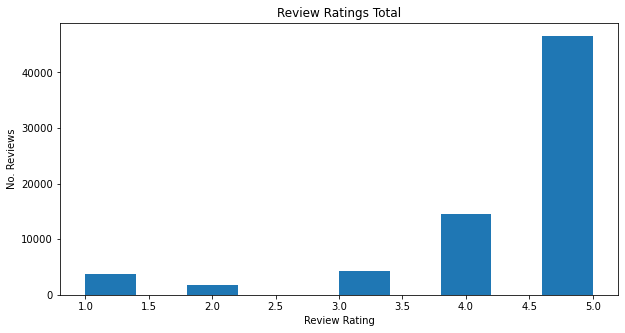

In [51]:
fig,ax = plt.subplots(figsize = (10,5))


ax.hist(pandas_df['reviewsrating'])
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Review Ratings Total')
plt.show()

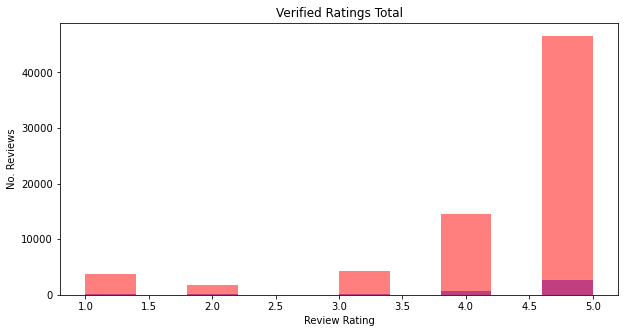

In [134]:
fig,ax = plt.subplots(figsize = (10,5))

ax.hist(verifieddf['reviewsrating'], color = 'blue',alpha =.5)
ax.hist(pandas_df['reviewsrating'],color ='red',alpha =.5)
ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Verified Ratings Total')

plt.show()

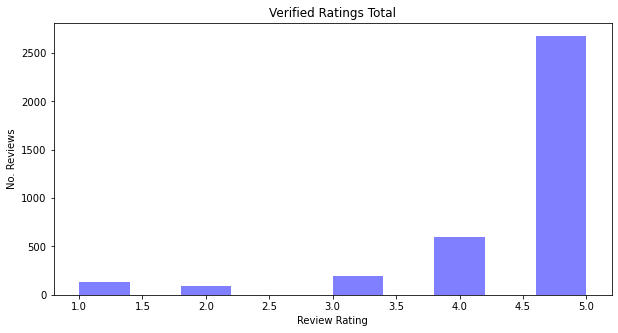

In [135]:
fig,ax = plt.subplots(figsize = (10,5))

ax.hist(verifieddf['reviewsrating'], color = 'blue',alpha =.5)

ax.set_xlabel('Review Rating')
ax.set_ylabel('No. Reviews')
ax.set_title('Verified Ratings Total')

plt.show()

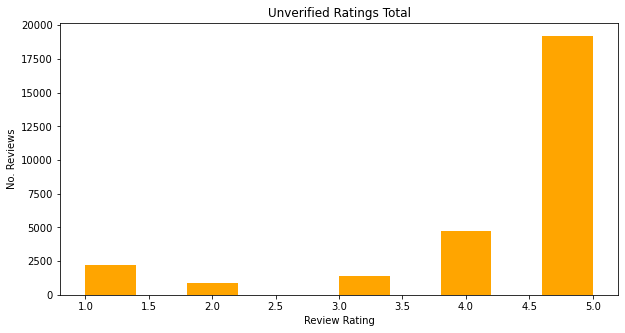

In [151]:
fig,ax = plt.subplots(figsize = (10,5))

# ax.hist(verifieddf['reviewsrating'])
ax.hist(nverifieddf['reviewsrating'],color = 'orange')
plt.xlabel('Review Rating')
plt.ylabel('No. Reviews')
plt.title('Unverified Ratings Total')
plt.show()


In [59]:
textlst = pandas_df['reviewstitle']
retstring = []
for i in textlst:
    if type(i) == str:
        retstring.append(i.lower()) 
titled={}
for i in retstring:
    if i not in titled:
        titled[i]= 0
    titled[i]+= 1 
titled
{k: v for k, v in sorted(titled.items(), key=lambda item: item[1],reverse = True)}

{'great movie': 2303,
 'great product': 1188,
 'good movie': 1091,
 'great': 634,
 'clorox wipes': 511,
 'love it': 436,
 'awesome': 428,
 'good': 316,
 'great family movie': 315,
 'love it!': 313,
 'funny movie': 301,
 'great product!': 294,
 'great movie!': 286,
 'cute movie': 280,
 'funny': 251,
 'excellent': 250,
 'awesome movie': 219,
 'good product': 190,
 'amazing': 187,
 'fun movie': 178,
 'easy to use': 175,
 'awesome product': 169,
 'great!': 169,
 'five stars': 166,
 'clorox': 160,
 'love this product': 155,
 'love': 153,
 'awesome!': 148,
 'hilarious': 145,
 'excellent movie': 144,
 'wipes': 143,
 'excellent product': 137,
 'great kids movie': 131,
 'olay total effects': 117,
 'tide pods': 115,
 'movie': 111,
 'works great': 109,
 'the best': 108,
 'love this product!': 103,
 'ok movie': 95,
 'ok': 91,
 'love this movie': 91,
 'good family movie': 89,
 'disappointed': 87,
 'amazing!': 87,
 'love!': 84,
 'loved it': 83,
 'love them': 81,
 'convenient': 80,
 'great moisturize

In [55]:
verifieddf[verifieddf['URL'].str.contains('walmart')]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
1,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor. This review was collected as part...,Good,https://www.walmart.com/reviews/product/29775278
2,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,None,5,Good flavor.,Good,https://www.walmart.com/reviews/product/29775278
18,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-01T00:00:00.000Z,True,True,3,I bought this because it had better reviews th...,Pretty nice,https://www.walmart.com/reviews/product/43383370
23,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2017-08-15T00:00:00.000Z,True,None,5,Loved This review was collected as part of a p...,Loved,https://www.walmart.com/reviews/product/43383370
24,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-11-26T00:00:00.000Z,True,True,5,This is a good product. Will give you a great ...,Great sensation,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71020,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-11T00:00:00.000Z,True,True,5,I recommend this for people with dry eye who s...,Works For Dry Eye,https://www.walmart.com/reviews/product/17325078
71021,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-26T00:00:00.000Z,True,True,5,This is the only contact solution I use. I hav...,Best contact solution,https://www.walmart.com/reviews/product/17325078
71025,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2017-02-13T00:00:00.000Z,True,True,5,This is great for using daily to disinfect you...,Awesome product,https://www.walmart.com/reviews/product/17325078
71026,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2016-08-22T00:00:00.000Z,True,True,5,Worked wonderful !!,Margaret,https://www.walmart.com/reviews/product/173250...


In [60]:
nverifieddf[nverifieddf['URL'].str.contains('walmart')]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
3,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,https://www.walmart.com/reviews/product/43383370
4,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,https://www.walmart.com/reviews/product/43383370
5,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-04-20T00:00:00.000Z,False,False,1,My boyfriend and I bought this to spice things...,Not worth it,https://www.walmart.com/reviews/product/43383370
6,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-08T00:00:00.000Z,False,False,1,Bought this earlier today and was excited to c...,Disappointing,https://www.walmart.com/reviews/product/43383370
7,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-02-21T00:00:00.000Z,False,False,1,I bought this product for my husband and I to ...,Not happy at all,https://www.walmart.com/reviews/product/43383370
...,...,...,...,...,...,...,...,...,...,...,...
71037,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-10-14T00:00:00.000Z,False,True,5,Great item,Great,https://www.walmart.com/reviews/product/10294232
71038,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2010-07-17T00:00:00.000Z,False,True,5,Since I've starting wearing my contacts full-t...,Worth every penny.,https://www.walmart.com/reviews/product/10294231
71039,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2012-03-25T00:00:00.000Z,False,True,5,I'm dealing with dry eyes and very sensitive t...,Solves the problem,https://www.walmart.com/reviews/product/10294231
71040,Opti-Free,"Personal Care,Eye & Ear Care,Eye Care,Contact ...",Opti-Free,Opti-Free Puremoist Disinfecting Solution 10fl Oz,2015-12-07T00:00:00.000Z,False,True,5,Great stuff! Helps keep my contacts moist all ...,Great stuff!,https://www.walmart.com/reviews/product/10294231


In [61]:
from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in retstring.split(' '):
    if i.lower() not in dicts:
        dicts[i.lower()]=0
    dicts[i.lower()]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}


AttributeError: 'list' object has no attribute 'split'

In [62]:
textlst = verifieddf['reviewstitle'].tolist()
vretstring = []
for i in textlst:
    if type(i) == str:
        vretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in vretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
# total verified review titles 

{'great product': 87,
 'great': 54,
 'love it': 33,
 'good': 32,
 'excellent': 28,
 'good product': 25,
 'love it!': 21,
 'awesome': 20,
 'yummy': 20,
 'works great': 20,
 'great movie': 19,
 'great hairspray': 16,
 'the best': 15,
 'delicious': 15,
 'great hold': 15,
 'great product!': 12,
 'yum': 11,
 'nice': 11,
 'easy to use': 11,
 'excellent product': 10,
 'wonderful': 9,
 'great!': 9,
 'works great!': 9,
 'pantene pro-v airspray': 9,
 'great value': 8,
 'good stuff': 8,
 'loved it': 8,
 'love them': 8,
 'hair spray': 8,
 'very good': 7,
 'love these': 7,
 'tasty': 7,
 'pantene hair spray': 7,
 'love': 6,
 'works well': 6,
 'not what i expected': 6,
 'delicious!': 6,
 'great stuff': 6,
 'great price': 6,
 'chips': 6,
 'yum!': 6,
 'great snack': 6,
 'bisquick': 6,
 'cinnamon toast crunch': 6,
 'cereal': 6,
 'good hairspray': 6,
 'great hair spray': 6,
 'movie': 5,
 'fantastic': 5,
 'love this product': 5,
 'amazing': 5,
 'the best!': 5,
 'i love it': 5,
 'best': 5,
 'cookies': 5,
 

In [100]:
len(verifieddf)

3682

In [91]:
textlst = nverifieddf['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

totalcounts = 0
for k,v in dicts.items():
    if "clorox" in k or 'olay' in k or 'tide'in k:
        totalcounts+= v

#total unverified review title words 

In [80]:
clowipe= pandas_df[pandas_df['reviewstitle']=='clorox wipes']

In [82]:
clowipe[clowipe['doRecommend']==True]

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
7019,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,4,clorox wipes are convenient when your travelin...,clorox wipes,https://www.walmart.com/reviews/product/148983...
7061,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-16T00:00:00.000Z,False,True,4,clorox wipes are a great tool to carry when tr...,clorox wipes,https://www.walmart.com/reviews/product/148983...
7180,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-23T00:00:00.000Z,False,True,4,I've used Clorox wipes on stains and grease. T...,clorox wipes,https://www.walmart.com/reviews/product/148983...
7223,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-04T00:00:00.000Z,False,True,4,awesome product. I really really really like t...,clorox wipes,https://www.walmart.com/reviews/product/148983...
7268,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-02-25T00:00:00.000Z,False,True,4,I really like this product. Easy to use only o...,clorox wipes,https://www.walmart.com/reviews/product/148983...
...,...,...,...,...,...,...,...,...,...,...,...
19501,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-26T00:00:00.000Z,False,True,5,I use them mostly in the camper. Can't take th...,clorox wipes,https://www.walmart.com/reviews/product/254837...
19795,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-03-19T00:00:00.000Z,False,True,5,clorox always cleans and disinfects everytime ...,clorox wipes,https://www.walmart.com/reviews/product/254837...
19906,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-25T00:00:00.000Z,False,True,5,This is a great product. I use at my job and a...,clorox wipes,https://www.walmart.com/reviews/product/254837...
20476,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2016-02-04T00:00:00.000Z,False,True,5,I keep these under the sink in every bathroom ...,clorox wipes,https://www.walmart.com/reviews/product/254837...


In [97]:
onlyclor= pandas_df[pandas_df['brand']=='Clorox']
onlyclor

,brand,categories,manufacturer,name,reviewsdate,didPurchase,doRecommend,reviewsrating,reviewstext,reviewstitle,URL
6588,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2012-01-26T13:31:39.000Z,None,True,1,"This is an outstanding product, it not only cl...",Fresh Smell,https://redsky.target.com/groot-domain-api/v1/...
6589,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-08-15T15:47:17.000Z,None,None,1,I have been an avid user of Clorox Wipes for m...,Smell,https://redsky.target.com/groot-domain-api/v1/...
6590,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-29T07:41:03.000Z,None,None,1,I have used Clorox Wipes for years... Cannot l...,Who Changed The Scent??,https://redsky.target.com/groot-domain-api/v1/...
6591,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2013-03-26T00:03:29.000Z,None,None,1,I use Clorox wipes fanatically all over my hom...,New Product Stinks,https://redsky.target.com/groot-domain-api/v1/...
6592,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-01T00:00:00.000Z,False,True,1,"Being a mom of three, disinfecting the home ha...",Germ free,https://www.walmart.com/reviews/product/148983...
...,...,...,...,...,...,...,...,...,...,...,...
20879,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-20T22:53:15.000Z,None,True,5,This is the only bathorom cleaner that I will ...,The Very Best,https://redsky.target.com/groot-domain-api/v1/...
20880,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-20T17:31:45.000Z,None,True,5,ok so maybe a tad ocd. but smell and cleanline...,Effeciently To Say The Least,https://redsky.target.com/groot-domain-api/v1/...
20881,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2014-09-24T00:00:00.000Z,True,True,5,it cleans very good leaves a piney scent but n...,it's clorox need more,https://www.walmart.com/reviews/product/124438...
20882,Clorox,"Household Chemicals,Household Cleaners,Bath & ...",AmazonUs/CLOO7,Clorox Disinfecting Bathroom Cleaner,2012-01-25T00:00:00.000Z,False,True,5,The bathroom is the nastiest place in the hous...,Tough power in a tough place,https://www.walmart.com/reviews/product/124438...


In [99]:
len(nverifieddf)

28476

In [64]:
high_verify= verifieddf[verifieddf['reviewsrating']== 5]
textlst = high_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}
#  verified reviews with high ratings 

{'great product': 77,
 'great': 48,
 'love it': 32,
 'excellent': 27,
 'awesome': 20,
 'good': 19,
 'yummy': 19,
 'love it!': 18,
 'great movie': 17,
 'works great': 17,
 'the best': 15,
 'good product': 15,
 'delicious': 15,
 'great hairspray': 13,
 'great hold': 13,
 'great product!': 11,
 'yum': 10,
 'excellent product': 9,
 'great!': 9,
 'great value': 8,
 'wonderful': 8,
 'love them': 8,
 'works great!': 8,
 'love these': 7,
 'nice': 7,
 'easy to use': 7,
 'love': 6,
 'loved it': 6,
 'delicious!': 6,
 'great stuff': 6,
 'yum!': 6,
 'great snack': 6,
 'tasty': 6,
 'good stuff': 5,
 'movie': 5,
 'fantastic': 5,
 'great price': 5,
 'best': 5,
 'cinnamon toast crunch': 5,
 'cereal': 5,
 'pantene pro-v airspray': 5,
 'works well': 4,
 'love this product': 4,
 'amazing': 4,
 'wonderful product': 4,
 'the best!': 4,
 'very good': 4,
 'i love it': 4,
 'awesome!': 4,
 'very nice': 4,
 'awesome product': 4,
 'love this': 4,
 'perfect size': 4,
 'great containers': 4,
 'tide': 4,
 'hair spra

In [67]:
low_verify= verifieddf[verifieddf['reviewsrating']== 1]
textlst = low_verify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

# verfified reviews  with low rating

{'not what i expected': 2,
 'disappointed': 2,
 'not a fan': 2,
 'it has a nasty smell that would get anyone sick': 1,
 "it didn't feel natural on my skin.": 1,
 'different formula than normal': 1,
 'definetaly not a granola bar': 1,
 'i scream when i look into the mirror': 1,
 'nothing to write home about': 1,
 'no quality': 1,
 'basically like the shampoo only thicker.': 1,
 'scammed': 1,
 "didn't get what i ordered": 1,
 'ragu cheesy roasted garlic parmesan sauce': 1,
 'faulty workmanship': 1,
 'bland': 1,
 'tai pei': 1,
 'd con': 1,
 'you send the wrong product': 1,
 'not as advertised': 1,
 'horrible': 1,
 'no no no.': 1,
 "don't buy": 1,
 'lacquer indeed...': 1,
 'disappointing': 1,
 'rusted and busted': 1,
 'they must have changed the formula': 1,
 'sticky sticky sticky': 1,
 'not as good as they say!': 1,
 'shipping issue': 1,
 'sadly was ruined': 1,
 'tostitos bite size chips': 1,
 'dallas area frito products are better': 1,
 'chipped chips': 1,
 'never no no!!!': 1,
 'chips a

In [65]:
low_nverify= nverifieddf[nverifieddf['reviewsrating']== 1]
textlst = low_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

#low unverified ratings for products 

{'disappointed': 31,
 'horrible': 23,
 'poor quality': 16,
 'tide pods': 16,
 'terrible': 15,
 'waste of money': 13,
 'very disappointed': 12,
 'new formula': 8,
 'horrible!': 8,
 'not for me': 8,
 'not worth it': 6,
 'what happened': 6,
 'not happy': 6,
 'bring back old formula': 6,
 'ruined clothes': 6,
 'disappointing': 5,
 'new formula is terrible': 5,
 'please bring back the old formula': 5,
 'terrible product': 5,
 'awful': 5,
 'do not buy': 5,
 'pods': 5,
 'reveal mop': 5,
 'reveal spray mop': 5,
 'very disappointing': 4,
 'not what i expected': 4,
 'very disappointed!': 4,
 'not impressed': 4,
 'not good': 4,
 'exxtra gel': 4,
 'new formula is awful': 4,
 'hate the new formula': 4,
 'disappointed!': 4,
 'not very good': 4,
 "doesn't work": 4,
 'frustrated': 4,
 'so disappointed': 4,
 "don't buy": 3,
 'please bring back old formula': 3,
 'what is going on': 3,
 'why the change': 3,
 'bad': 3,
 'junk': 3,
 'sticky': 3,
 'nexxus exxtra gel': 3,
 'bring back the old formula!': 3,
 

In [68]:
high_nverify= nverifieddf[nverifieddf['reviewsrating']== 5]
textlst = high_nverify['reviewstitle'].tolist()
nretstring = []
for i in textlst:
    if type(i) == str:
        nretstring.append(i.lower())


from stop_words import get_stop_words
stop_words = get_stop_words('english')
dicts = {}
for i in nretstring:
    if i not in dicts:
        dicts[i]=0
    dicts[i]+=1
{k: v for k, v in sorted(dicts.items(), key=lambda item: item[1],reverse = True)}

#high unverified ratings for product

{'great product': 633,
 'clorox wipes': 311,
 'love it': 206,
 'great': 191,
 'great product!': 159,
 'awesome': 153,
 'love it!': 151,
 'clorox': 102,
 'awesome product': 98,
 'love this product': 98,
 'amazing': 93,
 'excellent': 92,
 'wipes': 92,
 'excellent product': 86,
 'love': 84,
 'easy to use': 74,
 'awesome!': 70,
 'love this product!': 67,
 'the best': 65,
 'great!': 64,
 'olay total effects': 53,
 'love them': 52,
 'amazing!': 48,
 'good': 48,
 'good product': 48,
 'love these!': 47,
 'tide pods': 45,
 'works great': 43,
 'love!': 43,
 'love them!': 39,
 'love these': 37,
 'great moisturizer': 36,
 'works great!': 36,
 'love clorox wipes': 36,
 'quick and easy': 36,
 'amazing product': 35,
 'convenient': 35,
 'love these wipes': 35,
 'olay total effects 7 in 1 anti-aging moisturizer': 35,
 'wonderful': 32,
 'clorox disinfecting wipes': 31,
 'love this!': 30,
 'love clorox': 30,
 'easy': 30,
 'i love this product': 29,
 'great stuff': 29,
 'smells great': 27,
 'wonderful pro

In [69]:
allclorox=pandas_df[pandas_df['brand'].str.contains('Clorox')]
len(allclorox)

10700

In [71]:
cloroxnv= nverifieddf[nverifieddf['brand'].str.contains('Clorox')]
len(cloroxnv)

8378

In [72]:
nveric= cloroxnv[cloroxnv['reviewsrating']<3]
len(nveric)

29

In [73]:
cloroxv= verifieddf[verifieddf['brand'].str.contains('Clorox')]
len(cloroxv)


25

In [74]:
len(cloroxv[cloroxv['reviewsrating']<4])


1